**Regression Task**
Given a dataset 'Life Expectancy Data.csv', we want to predict the life expectancy of people. 

The target variable is 'Life Expectancy'. Mean squared error and mean absolute error are metrics of evaluation.

Import the necessary libraries

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('/content/Life Expectancy Data.csv')

#1. Data Preprocessing

##1.1 Given dataset:

In [2]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


##1.2 Data preprocessing

###Glimpse:

In [4]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

###Dropping Rows:

We will drop rows with NaN values in 'Life expectancy', 'adult mortality', 'alcohol', 'BMI', 'diphtheria', 'polio', 'total expenditure', 'thinness 1-19 years', 'thinness 5-9 years', 'income composition of resources', 'schooling'.

In [6]:
df.drop(axis="rows", labels=df.index[df['Life expectancy '].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df['Adult Mortality'].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df['Alcohol'].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df[' BMI '].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df['Polio'].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df['Diphtheria '].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df['Total expenditure'].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df[' thinness  1-19 years'].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df[' thinness 5-9 years'].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df['Income composition of resources'].isna()], inplace=True)
df.drop(axis="rows", labels=df.index[df['Schooling'].isna()], inplace=True)

###Dropping Columns:

We will drop Hepatitis B, GDP and Population because of large number of missing values. Also we will drop country and status since this is categorical values

In [7]:
df.drop(axis="columns", labels="Country", inplace=True) 
df.drop(axis="columns", labels="Status", inplace=True) 
df.drop(axis="columns", labels="Hepatitis B", inplace=True) 
df.drop(axis="columns", labels="GDP", inplace=True) 
df.drop(axis="columns", labels="Population", inplace=True) 

In [8]:
df.isna().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

###Check for ? in the dataset

In [9]:
(df=='?').sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

###Duplicate rows:

In [10]:
df.index[df.duplicated()]

Int64Index([], dtype='int64')

###Data Visualization and other preprocessing:

In [11]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [12]:
cols = list(df.columns)
del cols[1]

In [13]:
def plotAll(data, cols):
  plt.figure(figsize=(25, 20))
  c = 1
  for col in cols:
    plt.subplot(4,4,c)
    plt.grid()
    plt.scatter(data[col], data['Life expectancy '])
    plt.xlabel(col)
    plt.ylabel('Life expectancy')
    c += 1
  plt.show()  

In [14]:
def plotOutliers(data, cols):
  plt.figure(figsize=(25, 20))
  c = 1
  for col in cols:
    plt.subplot(4,4,c)
    plt.boxplot(data[col])
    plt.title(col)
    c += 1
  plt.show()  

In [15]:
def countOutliers(data, cols):
  for col in cols:
    upper = data[col].quantile(0.75)
    lower = data[col].quantile(0.25)
    ubound = upper + 1.5 * (upper - lower)
    lbound = lower - 1.5 * (upper - lower)
    outlier = data[col].loc[data[col] > ubound].count() + data[col].loc[data[col] < lbound].count()
    print(str(col) + ": " + str(outlier))

In [16]:
def bringInBounds(data, cols):
  for col in cols:
    upper = data[col].quantile(0.75)
    lower = data[col].quantile(0.25)
    ubound = upper + 1.5 * (upper - lower)
    lbound = lower - 1.5 * (upper - lower)
    data.loc[data[col] > ubound, col] = ubound
    data.loc[data[col] < lbound, col] = lbound

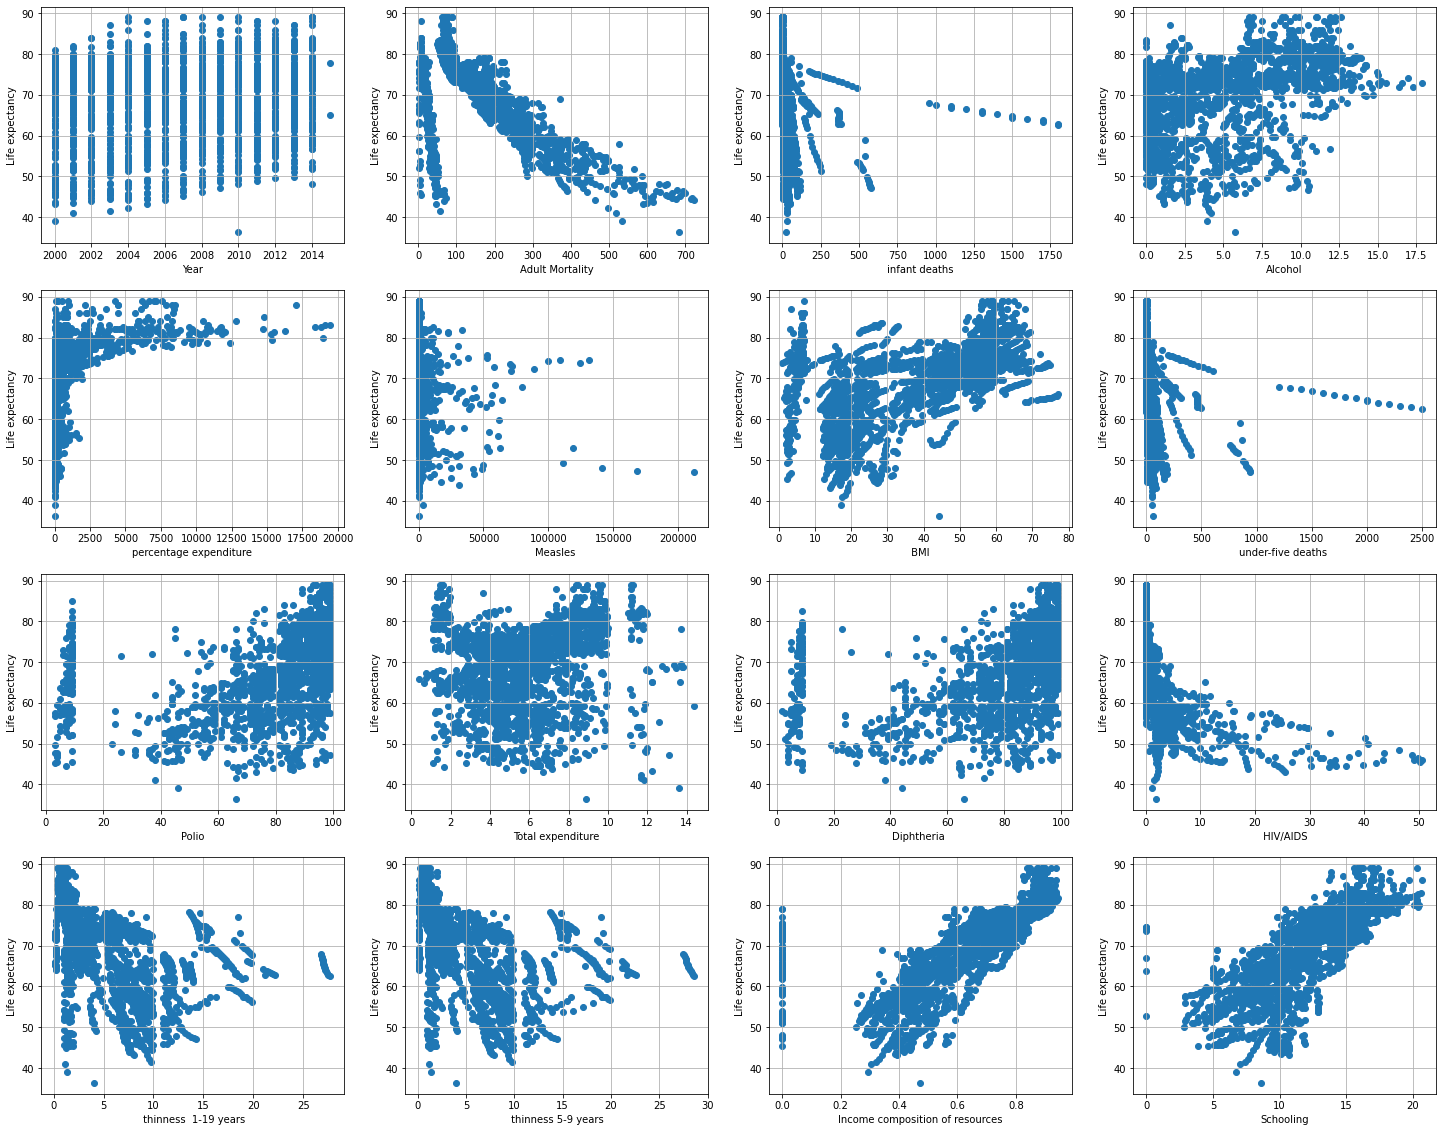

In [17]:
plotAll(df, cols)

Infant deaths is number of infant deaths per 1000 population. Having it above 1000 does not make sense. Since these are few in number, we will drop such rows.

In [18]:
df['infant deaths'].loc[df['infant deaths'] > 1000].count()

13

In [19]:
df.drop(axis="rows", labels=df.index[df['infant deaths'] > 1000], inplace=True)

Percentage expenditure on health should as a percentage of GDP should not be more than 100. A country cannot spend more than its GDP on healthcare. Let's look at such values

In [20]:
df['percentage expenditure'].loc[df['percentage expenditure'] > 100].count()

1292

We'll drop percentage expenditure as this feature has a large number of illogical values.

In [21]:
df.drop(axis="columns", labels="percentage expenditure", inplace=True) 

Let's look at the number of Measles cases above 1000. Ideally, it cannot be more than 1000 since it is measured per 1000 people

In [22]:
df['Measles '].loc[df['Measles '] > 1000].count()

427

In [23]:
df['Measles '].describe()

count      2543.000000
mean       2045.257570
std       10369.523541
min           0.000000
25%           0.000000
50%          14.000000
75%         329.000000
max      212183.000000
Name: Measles , dtype: float64

We will drop Measles column because of large number of illogical values in this feature.

In [24]:
df.drop(axis="columns", labels="Measles ", inplace=True) 

Under five deaths cannot be more than 1000. Since these are few in number, we will drop them.

In [25]:
df['under-five deaths '].loc[df['under-five deaths '] > 1000].count()

2

In [26]:
df.drop(axis="rows", labels=df.index[df['under-five deaths '] > 1000], inplace=True)

Schooling have some zero values as well. Let's look at the count of it.

In [27]:
df['Schooling'].loc[df['Schooling'] == 0].count()

10

We will drop rows with schooling equal to zero since these are few in number.

In [28]:
df.drop(axis="rows", labels=df.index[df['Schooling'] == 0], inplace=True)

Let's look at income composition of resources. There are a few zero values in it

In [29]:
df['Income composition of resources'].loc[df['Income composition of resources'] == 0].count()

104

We will drop rows with zero income composition of resoures in it.

In [30]:
df.drop(axis="rows", labels=df.index[df['Income composition of resources'] == 0], inplace=True)

In [31]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000
mean,2007.224969,69.533828,161.599918,21.379893,4.619073,38.703008,29.763906,83.250927,5.901253,83.334157,1.890688,4.720107,4.757726,0.658448,12.206634
std,4.284078,9.427267,125.150008,57.714344,4.046598,19.709763,81.630629,22.667333,2.387533,22.626743,5.500505,4.129511,4.199265,0.162462,3.098197
min,2000.000000,36.300000,1.000000,0.000000,0.010000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,0.100000,0.100000,0.253000,2.800000
25%,2004.000000,63.850000,72.500000,0.000000,0.850000,19.700000,0.000000,79.000000,4.280000,81.000000,0.100000,1.600000,1.500000,0.526000,10.300000
50%,2007.000000,72.400000,139.000000,3.000000,3.880000,44.700000,4.000000,93.000000,5.770000,93.000000,0.100000,3.300000,3.300000,0.687000,12.400000
75%,2011.000000,75.700000,222.000000,19.000000,7.595000,56.100000,24.000000,97.000000,7.470000,97.000000,0.700000,7.200000,7.200000,0.784000,14.300000
max,2015.000000,89.000000,723.000000,563.000000,17.870000,77.100000,907.000000,99.000000,14.390000,99.000000,50.600000,22.200000,22.600000,0.945000,20.700000


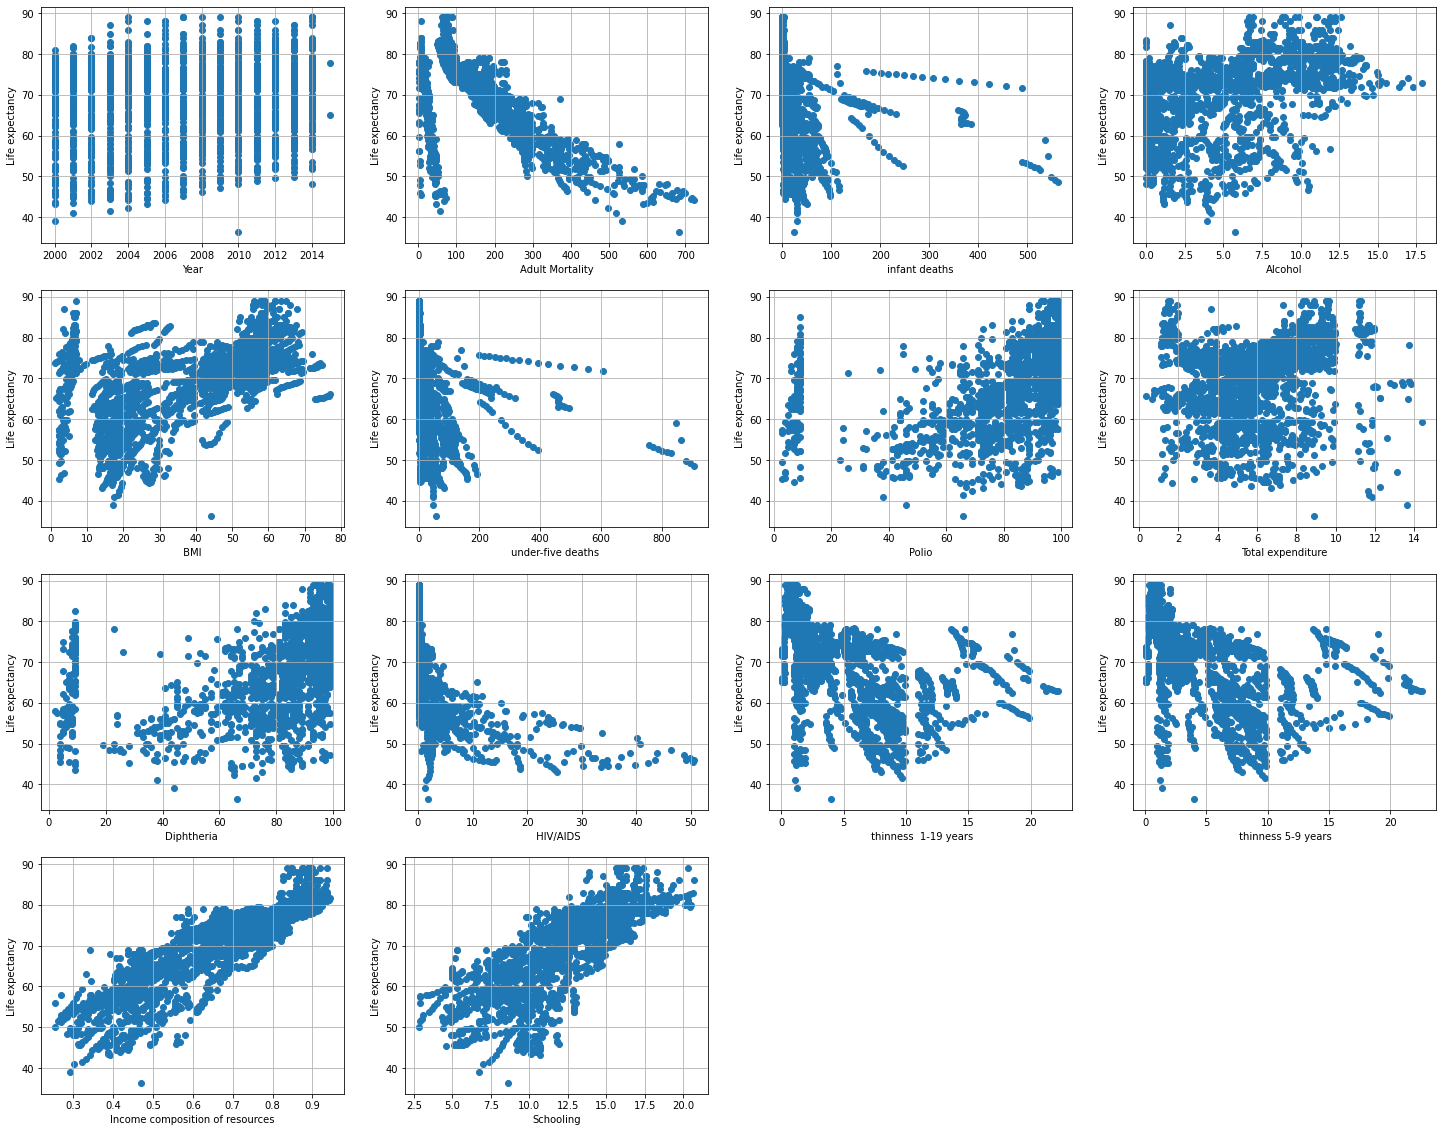

In [32]:
cols = list(df.columns)
del cols[1]
plotAll(df, cols)

In [33]:
cols = list(df.columns)
del cols[1]
countOutliers(df, cols)

Year: 0
Adult Mortality: 80
infant deaths: 274
Alcohol: 1
 BMI : 0
under-five deaths : 321
Polio: 218
Total expenditure: 13
Diphtheria : 250
 HIV/AIDS: 477
 thinness  1-19 years: 59
 thinness 5-9 years: 65
Income composition of resources: 0
Schooling: 23


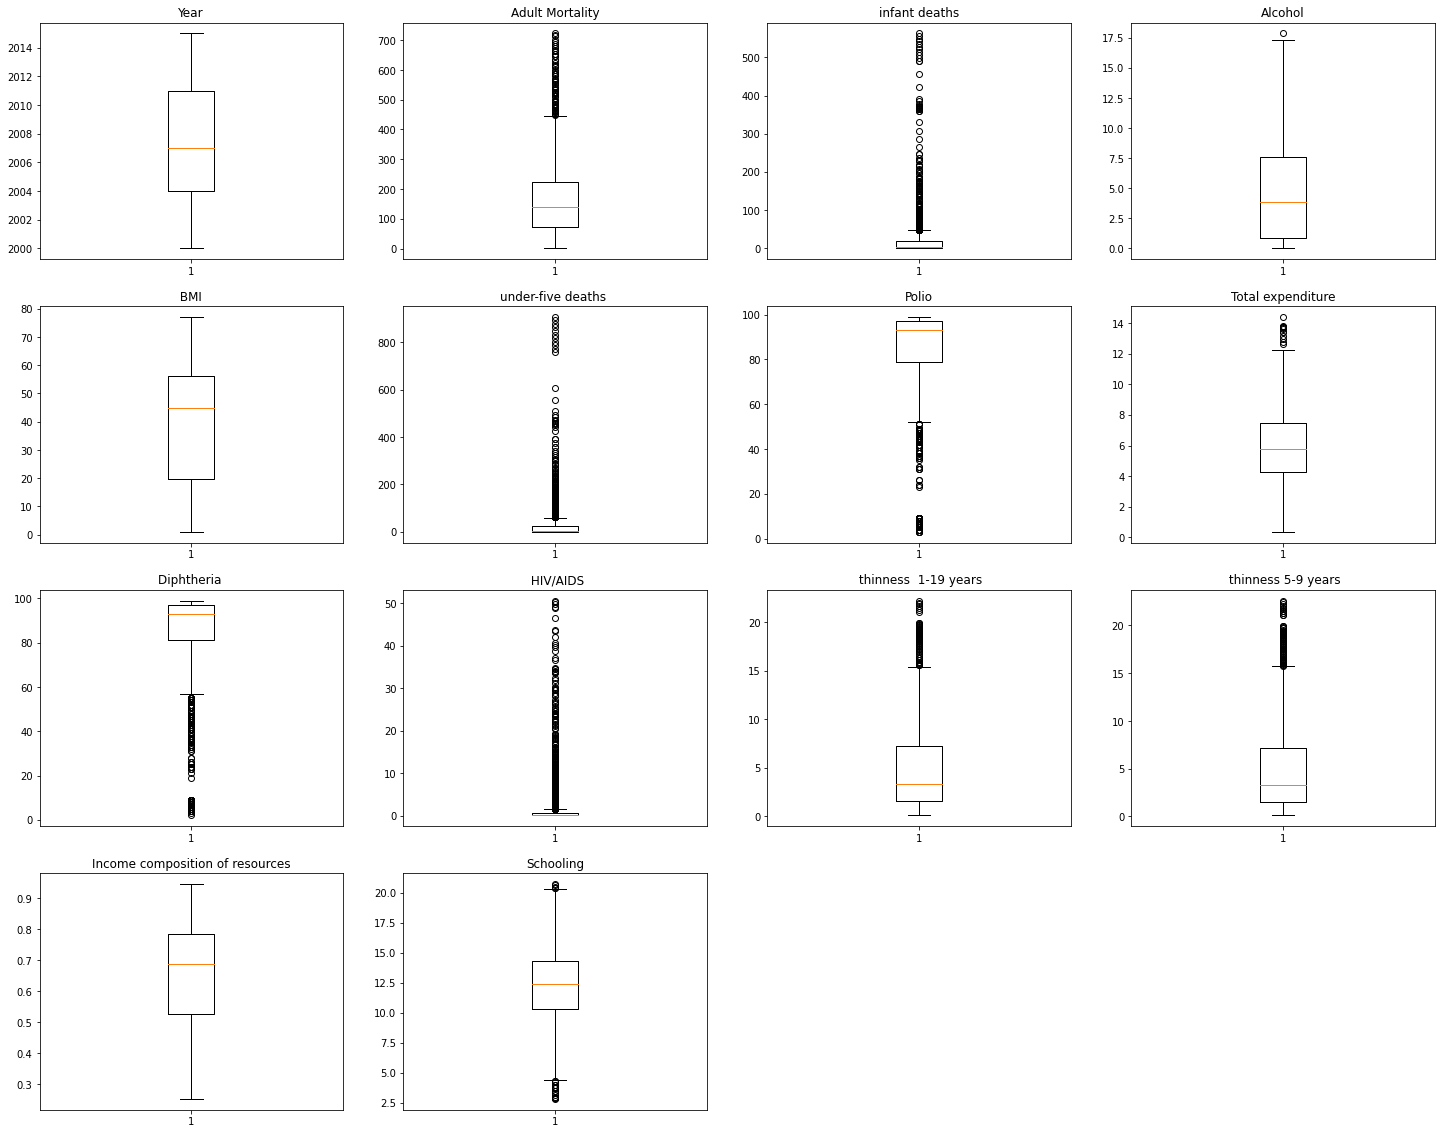

In [34]:
plotOutliers(df, cols)

In [35]:
bringInBounds(df, cols)

In [36]:
countOutliers(df, cols)

Year: 0
Adult Mortality: 0
infant deaths: 0
Alcohol: 0
 BMI : 0
under-five deaths : 0
Polio: 0
Total expenditure: 0
Diphtheria : 0
 HIV/AIDS: 0
 thinness  1-19 years: 0
 thinness 5-9 years: 0
Income composition of resources: 0
Schooling: 0


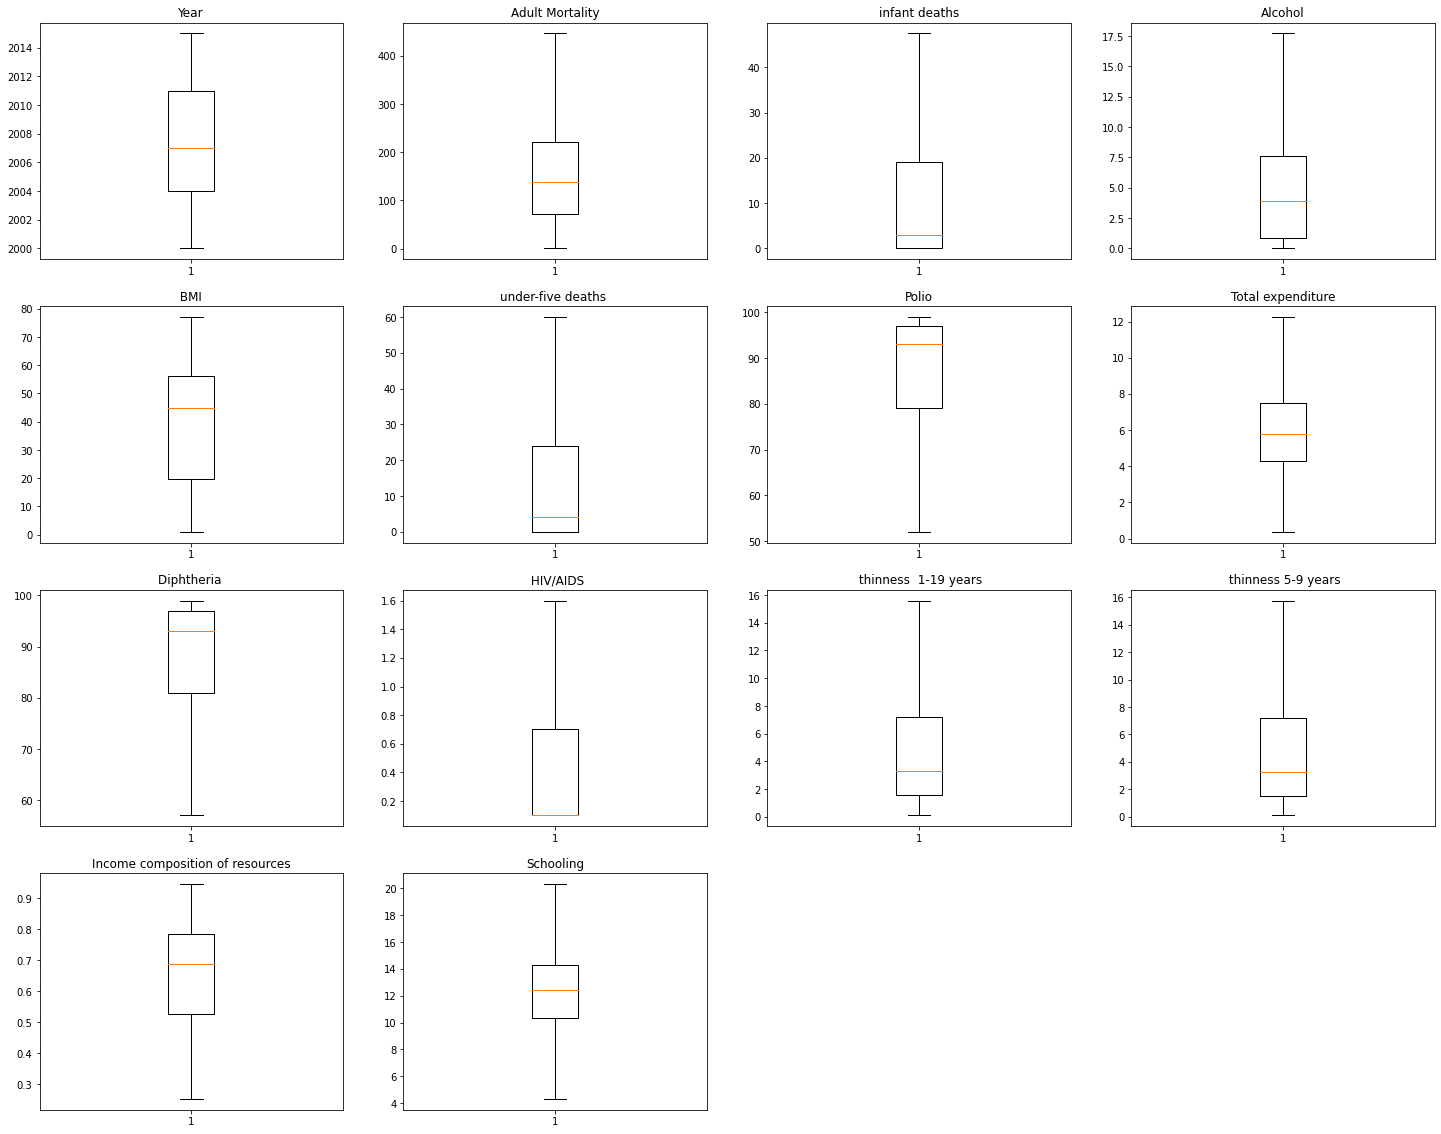

In [37]:
plotOutliers(df, cols)

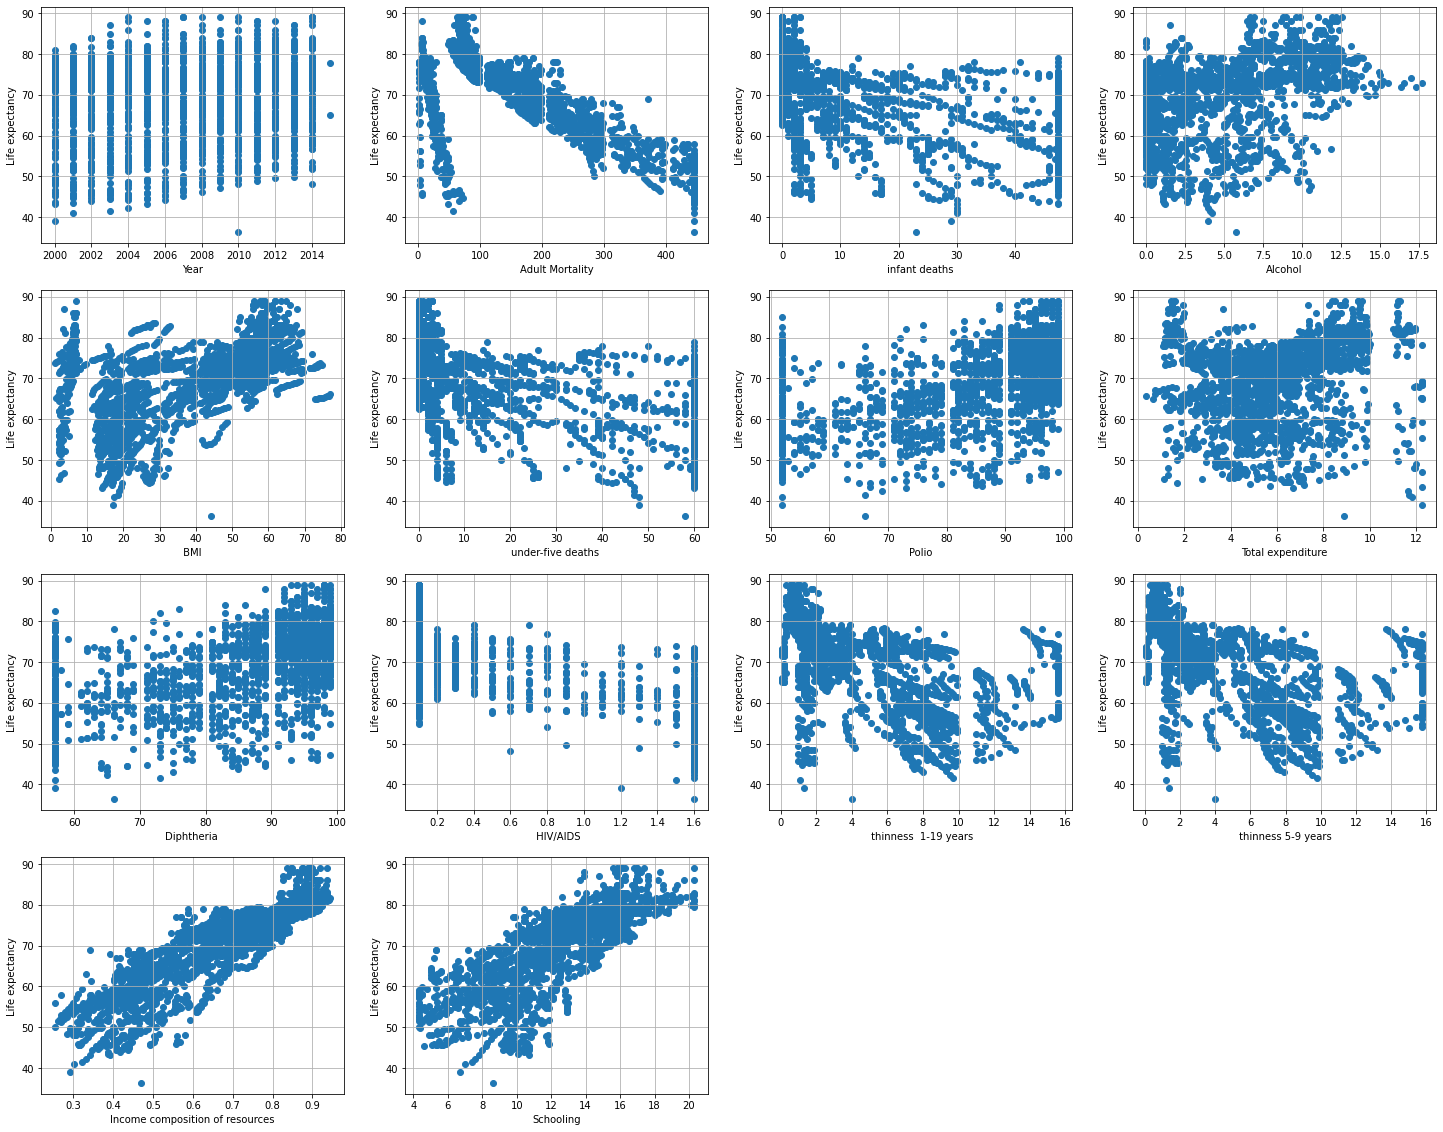

In [38]:
plotAll(df, cols)

####Correlation Matrix:

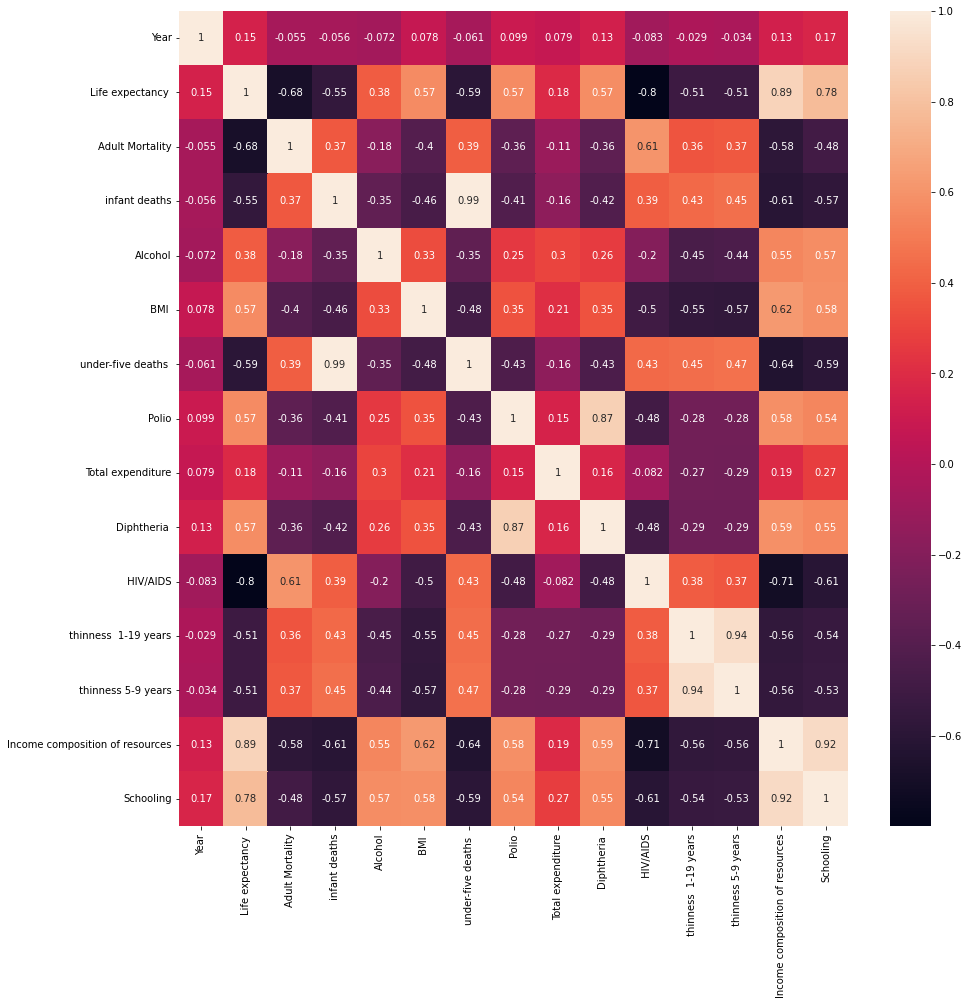

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

We will drop infant deaths (high correlation with under five deaths), Diphtheria (high correlation with polio), thinness 5-9 years (high correlation with thinness 1-19 years) and schooling (high correlation with income composition of resources). 

In [40]:
df.drop(axis="columns", labels="infant deaths", inplace=True) 
df.drop(axis="columns", labels=" thinness 5-9 years", inplace=True) 
df.drop(axis="columns", labels="Diphtheria ", inplace=True) 
df.drop(axis="columns", labels="Schooling", inplace=True) 

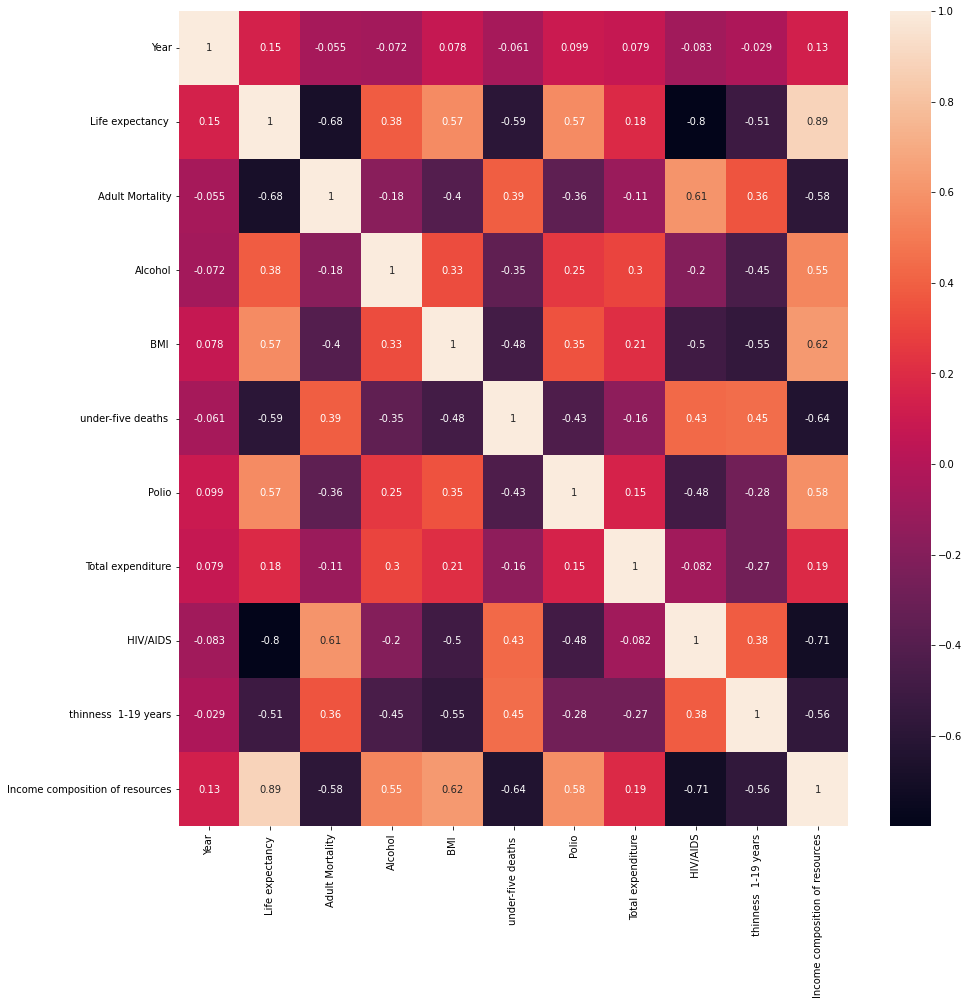

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

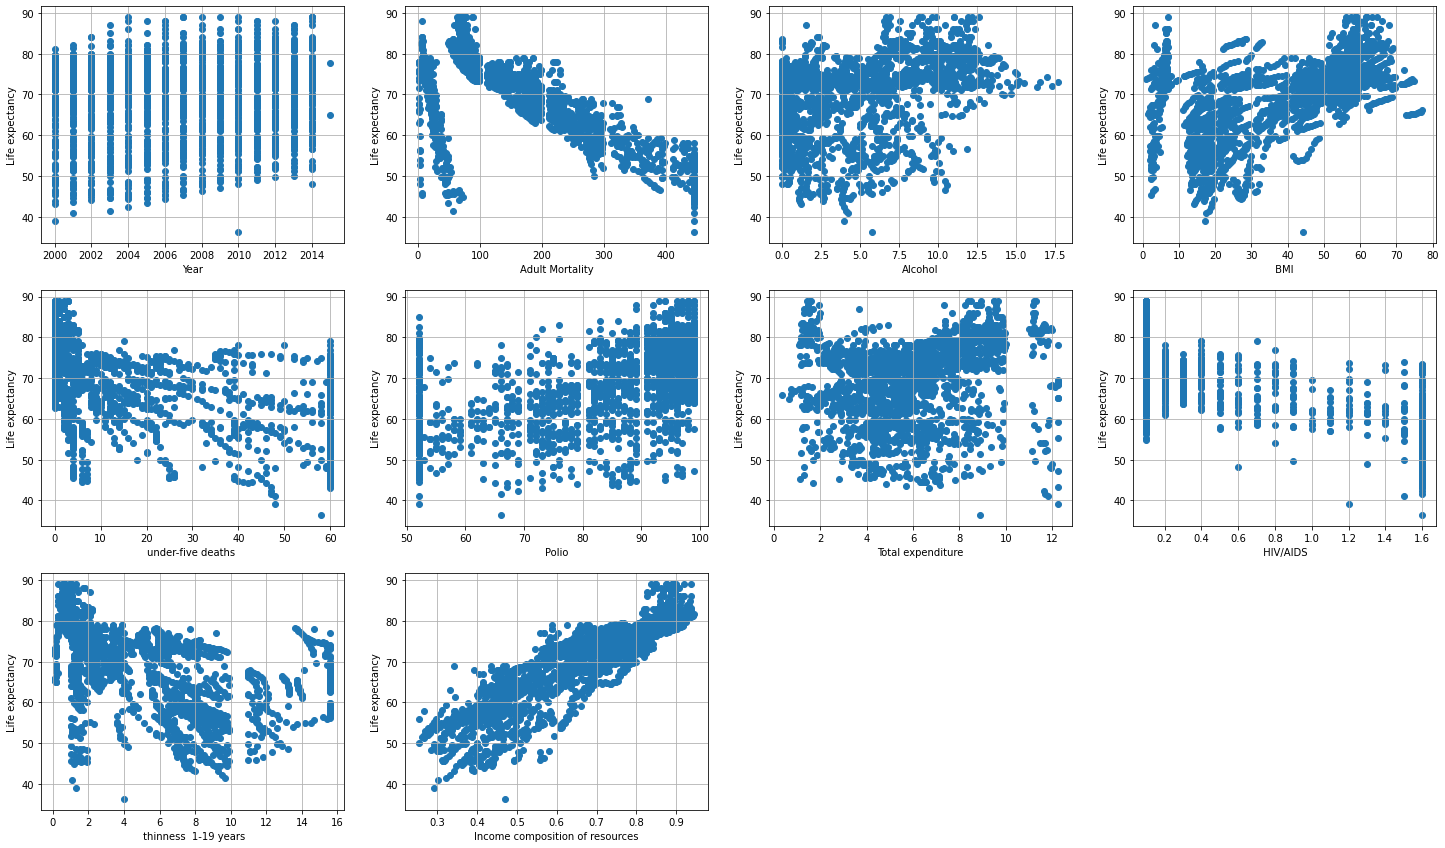

In [42]:
cols = list(df.columns)
del cols[1]
plotAll(df, cols)

#2. Get Training and Testing dataset:

Normalize:

In [43]:
def normalize(x):
  max = np.amax(x, axis=0)
  min = np.amin(x, axis=0)
  for row in x:
    for i in range(len(row)):
      row[i] = (row[i] - min[i]) / (max[i] - min[i])
  return x

Split into Training and testing dataset:

In [44]:
train = df.sample(frac = 0.75, replace = False)         #Returns training and testing data
test = df.drop(train.index)

train = train.to_numpy()
test = test.to_numpy()

y_train = train[:,1]
x_train = normalize(np.delete(train,1,1))
x_train = np.insert(x_train, 0, np.ones(len(x_train)), axis=1) 

y_test = test[:,1]
x_test = normalize(np.delete(test,1,1))
x_test = np.insert(x_test, 0, np.ones(len(y_test)), axis=1) 

Get Matrix by features:

In [45]:
def featureMatrix(feature):
  i = df.columns.get_loc(feature) 
  if feature == 'Year':
    i += 1
  ux_train = np.array([x_train[:,0], x_train[:,i]]).T
  ux_test = np.array([x_test[:,0], x_test[:,i]]).T
  return ux_train, ux_test, y_train, y_test

Find MEAN ABSOLUTE ERROR and MEAN SQUARED ERROR:

In [46]:
def errors(coeff, x_test, y_test, method):
  predicted = np.dot(x_test, coeff)
  MeanAbsoluteError = np.mean(np.abs(predicted - y_test))
  MeanSquaredError = np.mean(np.square(predicted - y_test))
  print('\033[4m' + method + ' solution' + '\033[0m')
  print('Mean Absolute Error: ' + str(round(MeanAbsoluteError, 2)) + "      " + 'Mean Squared Error: ' + str(round(MeanSquaredError, 2)))
  print("")

Plot the line curve:

In [47]:
def plotLine(xtrain, ytrain, coeff, method, xfeature):       #Plots scattered plot and line
  plt.xlabel(' Normalized ' + xfeature)
  plt.ylabel('Life Expectancy')
  if method:
    plt.title(method + ' Solution')
  else:
    plt.title('Given')
  plt.scatter(xtrain[:,1], ytrain)
  plt.grid()
  x = np.linspace(0, 1, 100)
  if coeff is not None:
    plt.plot(x, coeff[0]+coeff[1]*x, 'r', linewidth=3)

Plot Cost curve:

In [48]:
def plotCost(cost, method):
  # plt.figure(figsize=(5,5))
  plt.plot(cost)
  plt.xlabel('iteration')
  plt.ylabel('Cost')
  plt.title('Cost curve (' + method + ' solution)')
  plt.grid()
  # plt.show()

Print and Plot the output:

In [49]:
def printOut(xtest, ytest, xtrain, ytrain, wc, wg, wn, cg, cn, feature):
  print("\033[1mON TEST DATA:\033[0m")
  errors(wc, xtest, ytest, 'Closed Form')
  errors(wg, xtest, ytest, 'Gradient Descent')
  errors(wn, xtest, ytest, 'Newton Method')
  print("\033[1mON TRAINING DATA:\033[0m")
  errors(wc, xtrain, ytrain, 'Closed Form')
  errors(wg, xtrain, ytrain, 'Gradient Descent')
  errors(wn, xtrain, ytrain, 'Newton Method')

  plt.figure(figsize=(24, 13))
  col = 2
  row = 3
  plt.subplot(col,row,1)
  plotLine(xtrain, ytrain, None, None, feature)
  plt.subplot(col,row,4)
  plotLine(xtrain, ytrain, wc, 'Closed Form', feature)
  plt.subplot(col,row,2)
  plotCost(cg, 'Gradient Descent')
  plt.subplot(col,row,5)
  plotLine(xtrain, ytrain, wg, 'Gradient Descent', feature)
  plt.subplot(col,row,3)
  plotCost(cn, 'Newton Method')
  plt.subplot(col,row,6)
  plotLine(xtrain, ytrain, wn, 'Newton Method', feature)
  plt.show()

#3. Algorithms:

##Closed Form Solution:

In [50]:
def closedForm(x, y):              #Returns coefficients of line using closed form solution
  return np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

##Gradient Descent Method:

In [51]:
def gradient_descent(x, y, coeff, iterations, mu):
  costs = np.ones(iterations)
  for i in range(iterations):
    predicted = np.dot(x, coeff)
    error = predicted - y
    cost = np.sum(error ** 2) / len(x)
    costs[i] = cost
    grad = np.dot(x.transpose(), error) / len(x)
    coeff = coeff - mu * grad
  return coeff, costs

##Newton's Method for Optimization:

In [52]:
def fSquaredX(x):         #Returns 2 * x.T * x
  return 2 * np.dot(x.T, x)

def fDashX(x, y, w):      #Returns 2*x.T*x*w - 2*x.T*y
  b = 2 * np.dot(x.T, y)
  a = 2 * np.dot(x.T, np.dot(x, w.T))
  return np.subtract(a, b)

def NewtonGradientDescent(weight, x, y, iter):
  costs = []
  for i in range(iter):
    predicted = np.dot(x, weight)
    error = y - predicted
    costs.append(np.sum(error ** 2) / len(x))
    del2 = np.linalg.inv(fSquaredX(x))
    del1 = fDashX(x, y, weight)
    weight = np.subtract(weight, np.dot(del2, del1))
  return weight, costs

#4. Implementation

##Univariate

###Year

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 7.87      Mean Squared Error: 90.45

Gradient Descent solution
Mean Absolute Error: 7.87      Mean Squared Error: 90.45

Newton Method solution
Mean Absolute Error: 7.87      Mean Squared Error: 90.45

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 7.53      Mean Squared Error: 85.69

Gradient Descent solution
Mean Absolute Error: 7.53      Mean Squared Error: 85.69

Newton Method solution
Mean Absolute Error: 7.53      Mean Squared Error: 85.69



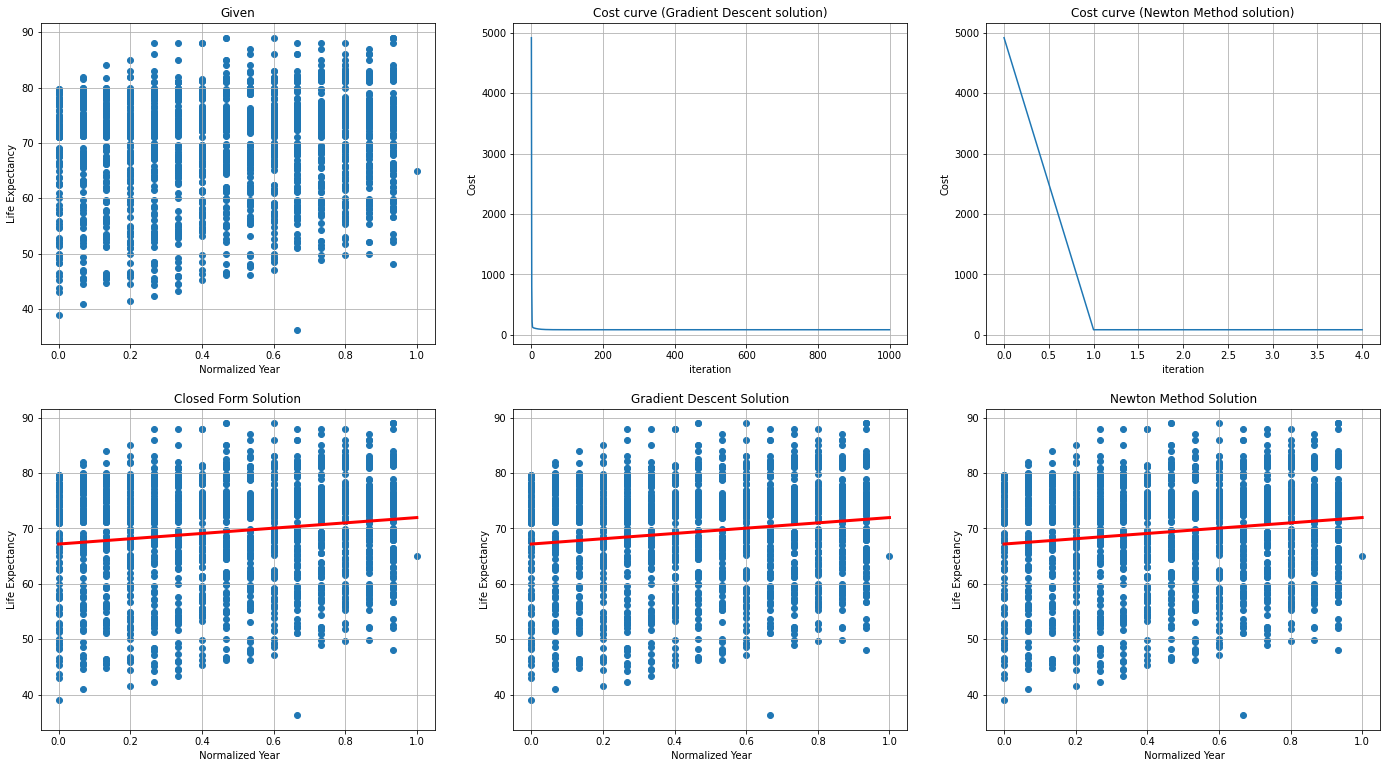

In [53]:
feature = 'Year'
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1000
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

###Adult Mortality

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 5.01      Mean Squared Error: 49.61

Gradient Descent solution
Mean Absolute Error: 5.01      Mean Squared Error: 49.61

Newton Method solution
Mean Absolute Error: 5.01      Mean Squared Error: 49.61

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 4.8      Mean Squared Error: 46.51

Gradient Descent solution
Mean Absolute Error: 4.8      Mean Squared Error: 46.51

Newton Method solution
Mean Absolute Error: 4.8      Mean Squared Error: 46.51



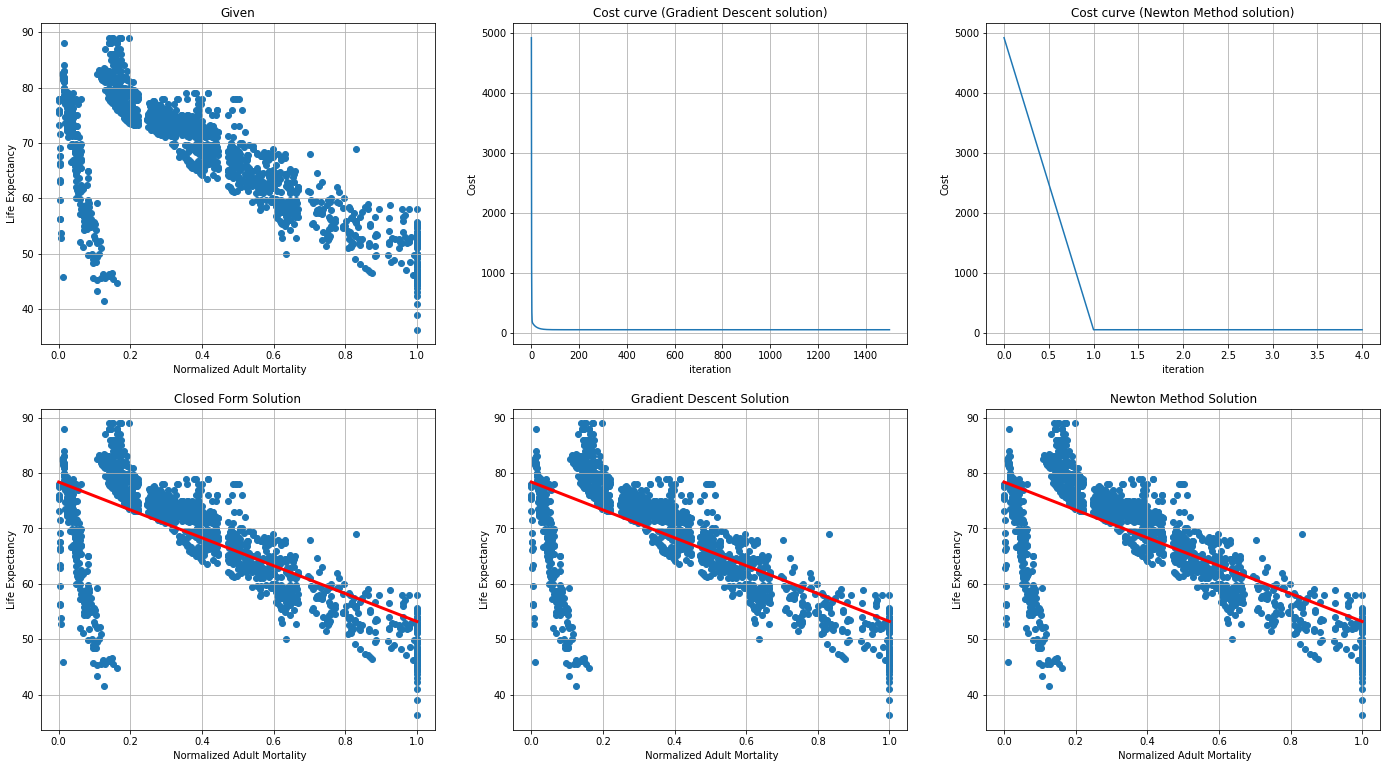

In [54]:
feature = 'Adult Mortality'
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

###Alcohol

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 7.02      Mean Squared Error: 81.8

Gradient Descent solution
Mean Absolute Error: 7.02      Mean Squared Error: 81.8

Newton Method solution
Mean Absolute Error: 7.02      Mean Squared Error: 81.8

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 6.74      Mean Squared Error: 74.19

Gradient Descent solution
Mean Absolute Error: 6.74      Mean Squared Error: 74.19

Newton Method solution
Mean Absolute Error: 6.74      Mean Squared Error: 74.19



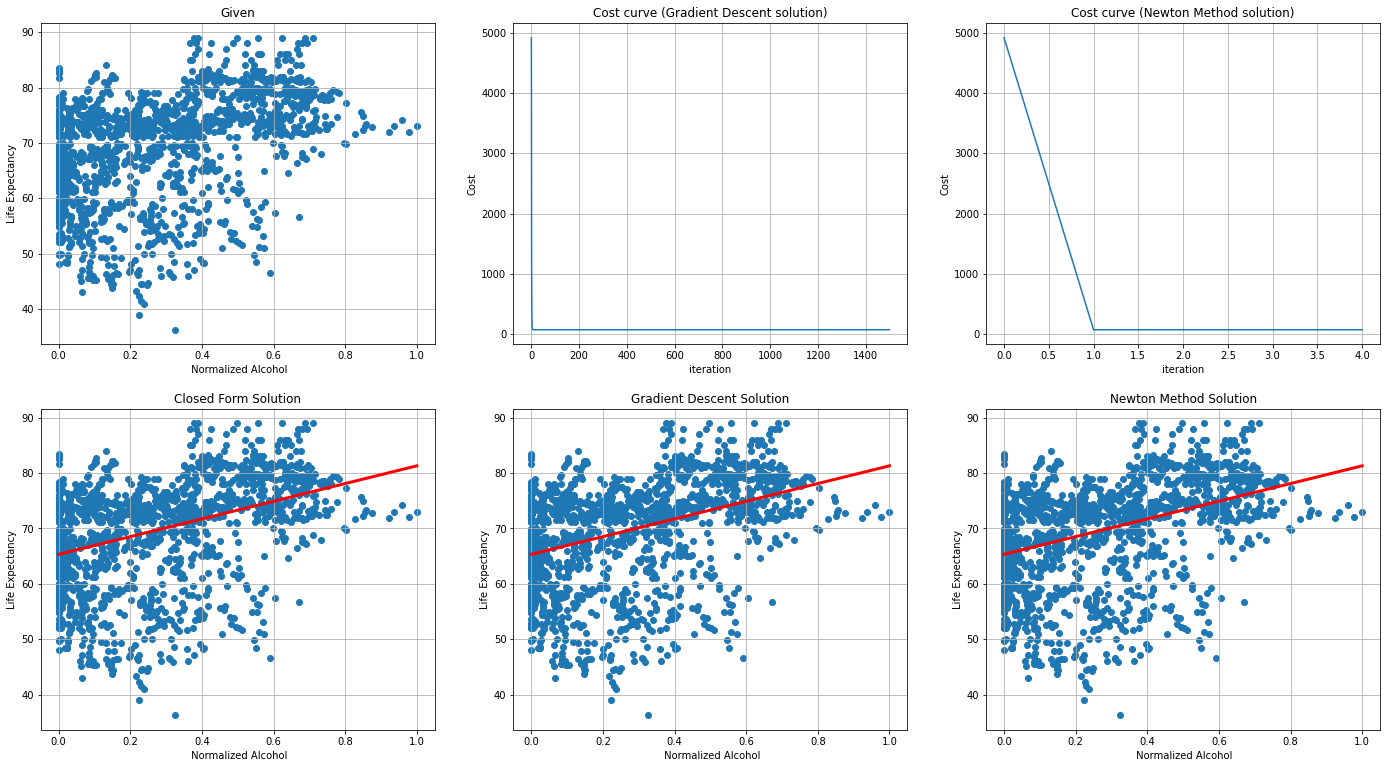

In [55]:
feature = 'Alcohol'
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

###BMI

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 5.99      Mean Squared Error: 63.04

Gradient Descent solution
Mean Absolute Error: 5.99      Mean Squared Error: 63.04

Newton Method solution
Mean Absolute Error: 5.99      Mean Squared Error: 63.04

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 5.78      Mean Squared Error: 59.39

Gradient Descent solution
Mean Absolute Error: 5.78      Mean Squared Error: 59.39

Newton Method solution
Mean Absolute Error: 5.78      Mean Squared Error: 59.39



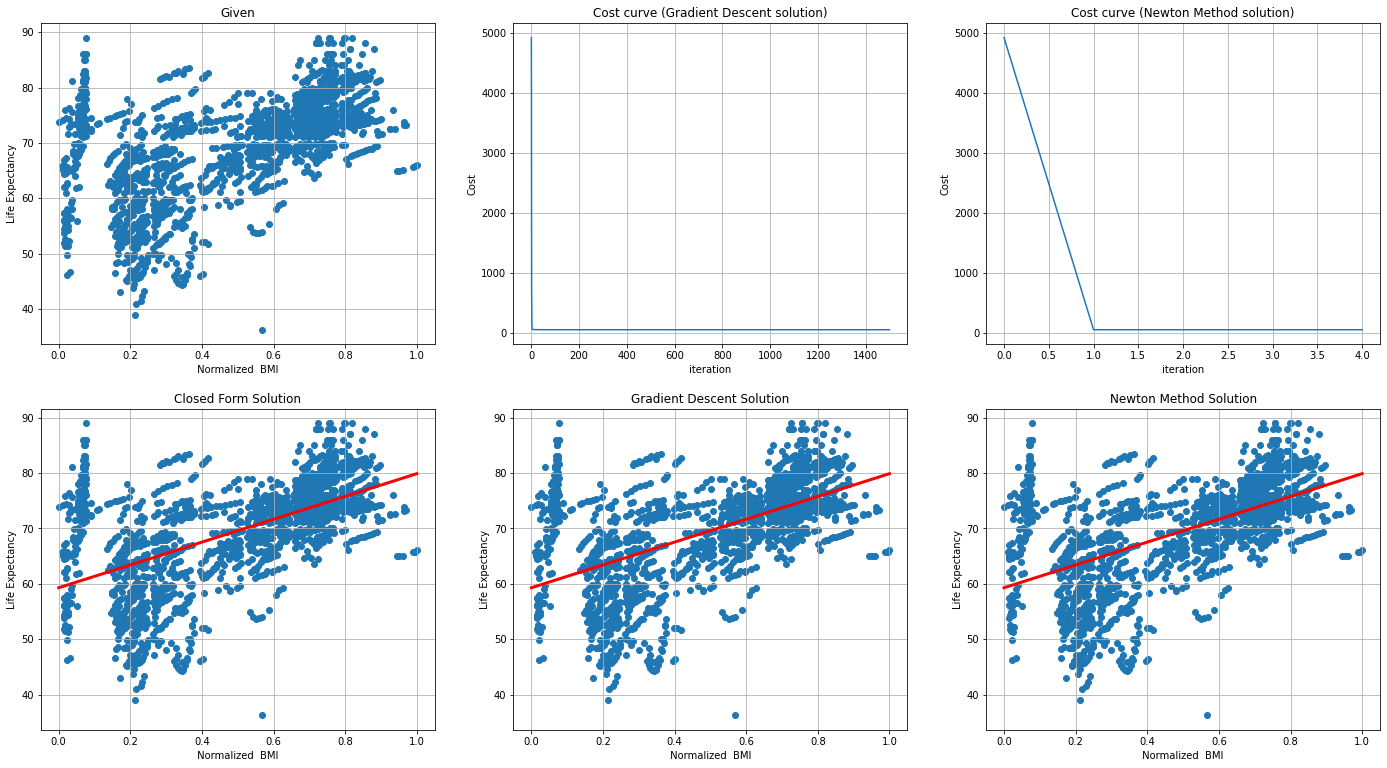

In [56]:
feature = ' BMI '
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

###Under Five Deaths:

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 6.1      Mean Squared Error: 63.74

Gradient Descent solution
Mean Absolute Error: 6.1      Mean Squared Error: 63.74

Newton Method solution
Mean Absolute Error: 6.1      Mean Squared Error: 63.74

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 5.68      Mean Squared Error: 55.84

Gradient Descent solution
Mean Absolute Error: 5.68      Mean Squared Error: 55.84

Newton Method solution
Mean Absolute Error: 5.68      Mean Squared Error: 55.84



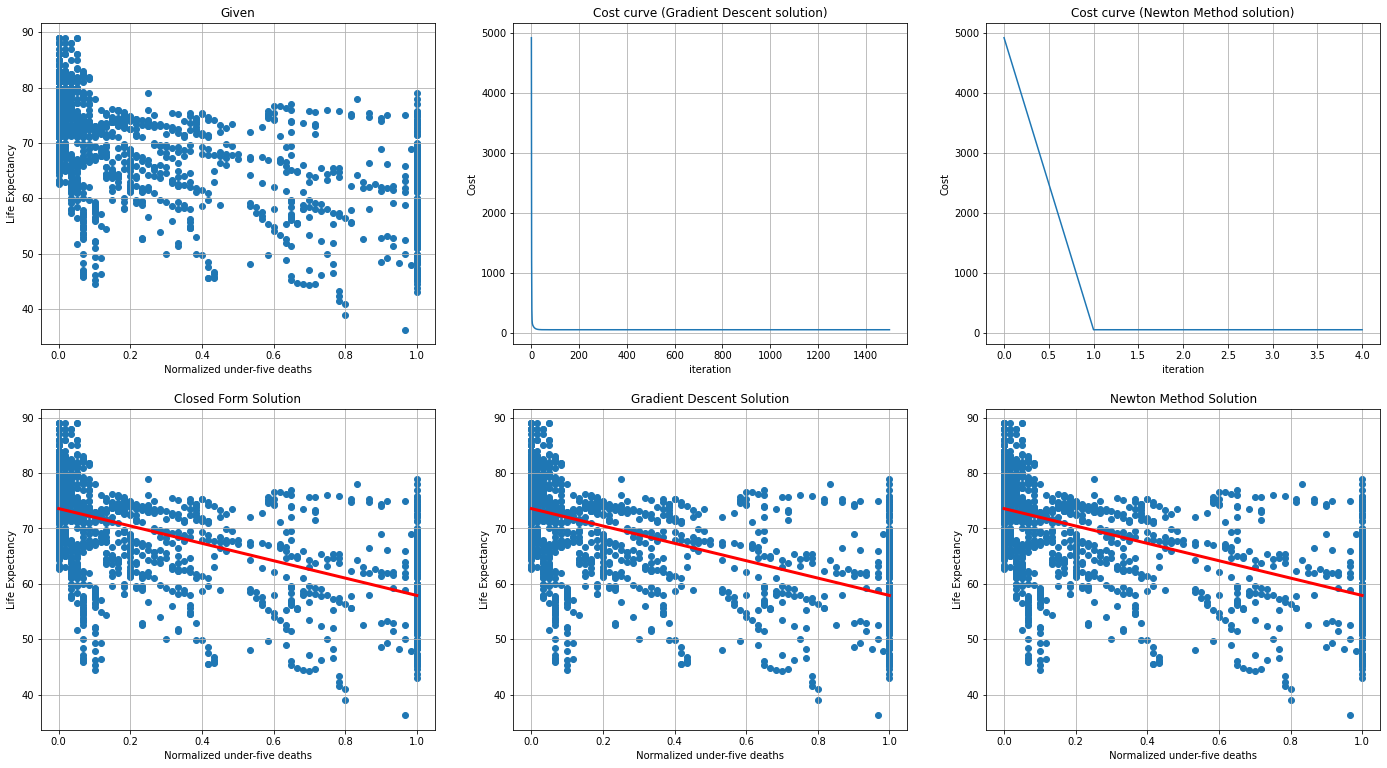

In [57]:
feature = 'under-five deaths '
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

###Polio

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 5.87      Mean Squared Error: 61.74

Gradient Descent solution
Mean Absolute Error: 5.87      Mean Squared Error: 61.74

Newton Method solution
Mean Absolute Error: 5.87      Mean Squared Error: 61.74

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 5.78      Mean Squared Error: 59.87

Gradient Descent solution
Mean Absolute Error: 5.78      Mean Squared Error: 59.87

Newton Method solution
Mean Absolute Error: 5.78      Mean Squared Error: 59.87



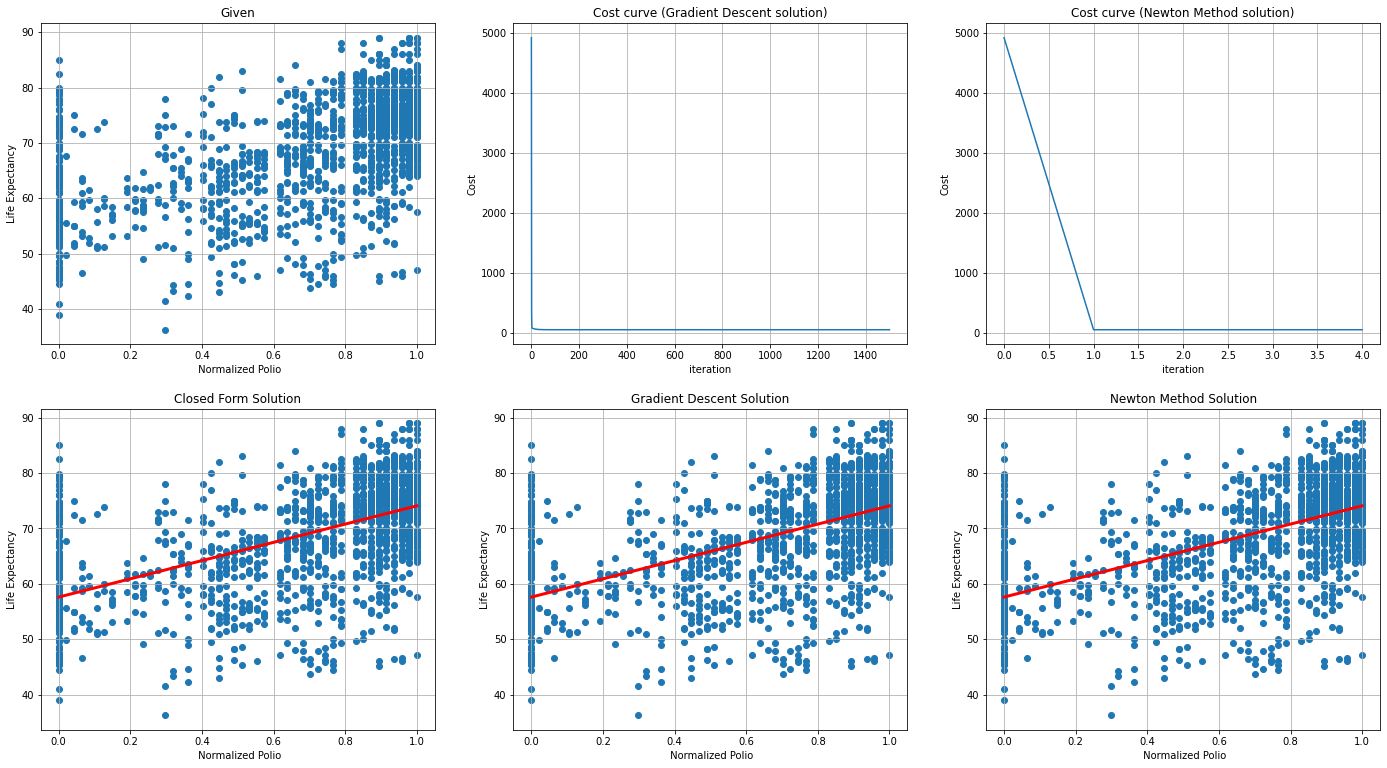

In [58]:
feature = 'Polio'
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

###Total Expenditure

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 7.68      Mean Squared Error: 89.0

Gradient Descent solution
Mean Absolute Error: 7.68      Mean Squared Error: 89.0

Newton Method solution
Mean Absolute Error: 7.68      Mean Squared Error: 89.0

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 7.29      Mean Squared Error: 84.76

Gradient Descent solution
Mean Absolute Error: 7.29      Mean Squared Error: 84.76

Newton Method solution
Mean Absolute Error: 7.29      Mean Squared Error: 84.76



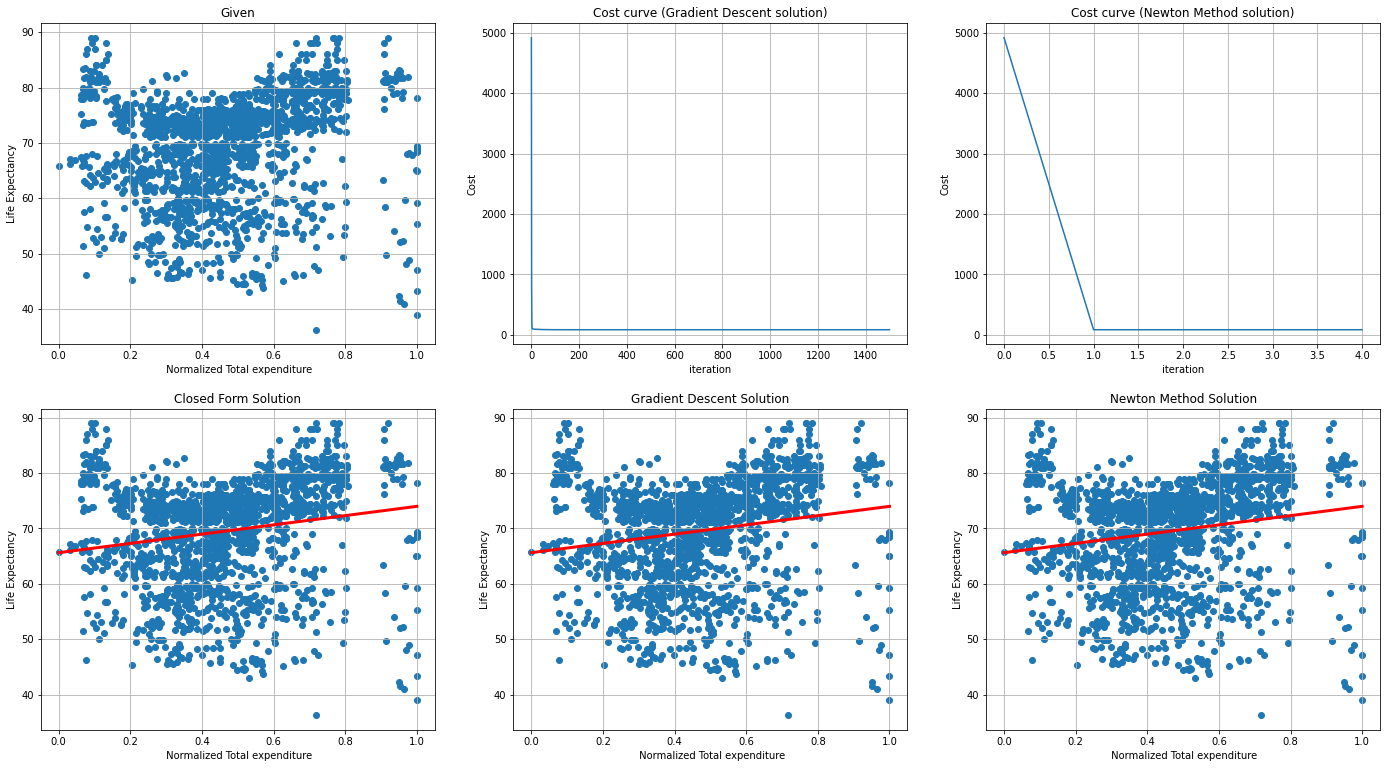

In [59]:
feature = 'Total expenditure'
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

###HIV/AIDS

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 4.12      Mean Squared Error: 30.51

Gradient Descent solution
Mean Absolute Error: 4.12      Mean Squared Error: 30.51

Newton Method solution
Mean Absolute Error: 4.12      Mean Squared Error: 30.51

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 4.37      Mean Squared Error: 32.51

Gradient Descent solution
Mean Absolute Error: 4.37      Mean Squared Error: 32.51

Newton Method solution
Mean Absolute Error: 4.37      Mean Squared Error: 32.51



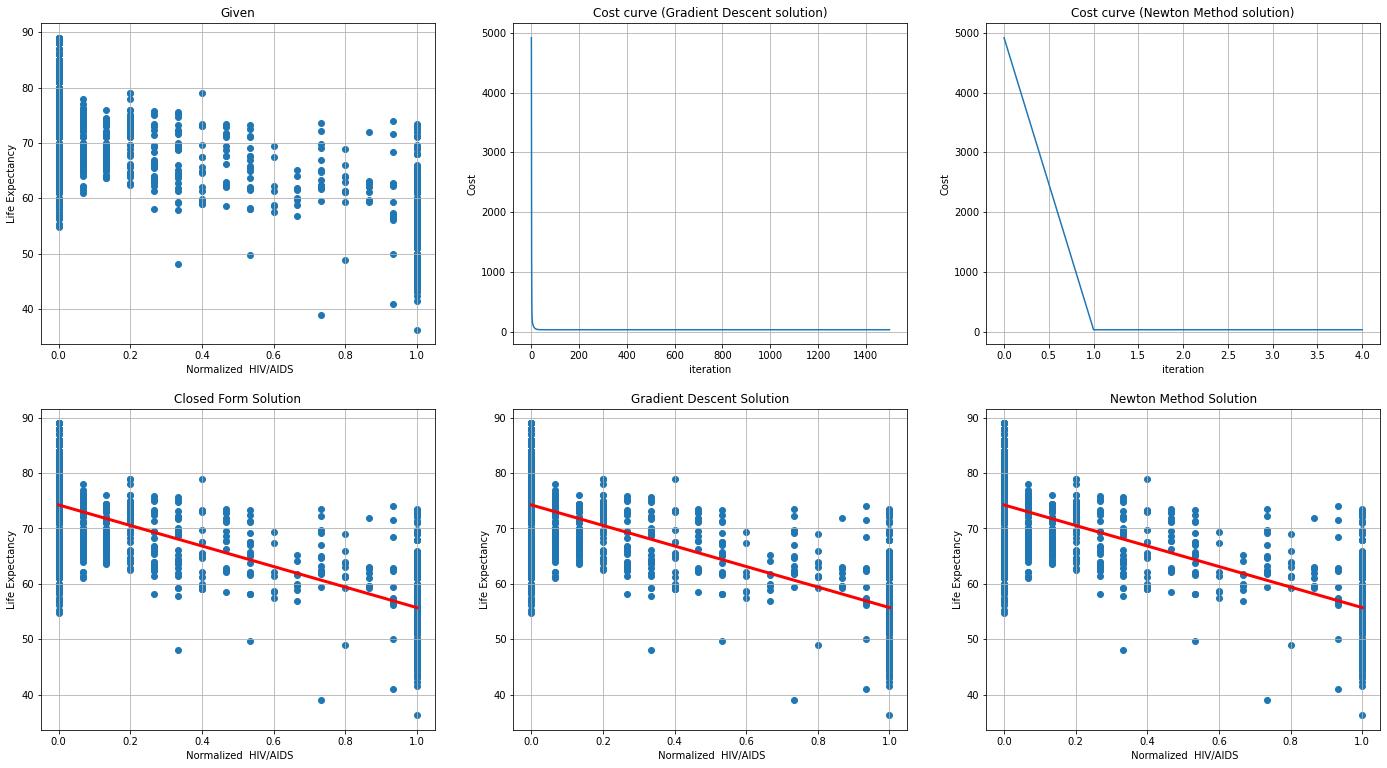

In [60]:
feature = ' HIV/AIDS'
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

###Thinness 1-19 years

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 6.4      Mean Squared Error: 66.04

Gradient Descent solution
Mean Absolute Error: 6.4      Mean Squared Error: 66.04

Newton Method solution
Mean Absolute Error: 6.4      Mean Squared Error: 66.04

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 6.31      Mean Squared Error: 65.75

Gradient Descent solution
Mean Absolute Error: 6.31      Mean Squared Error: 65.75

Newton Method solution
Mean Absolute Error: 6.31      Mean Squared Error: 65.75



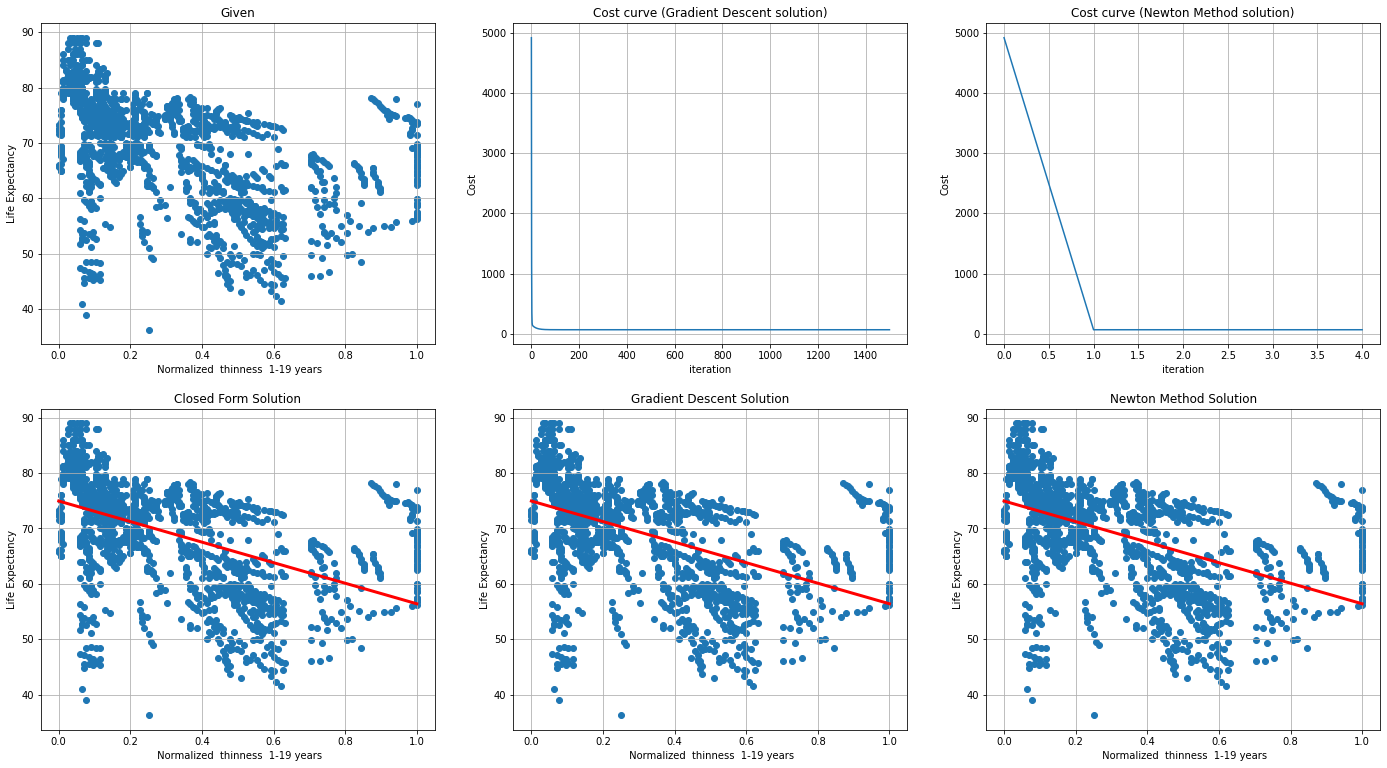

In [61]:
feature = ' thinness  1-19 years'
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

###Income Composition of Resources

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 3.37      Mean Squared Error: 20.69

Gradient Descent solution
Mean Absolute Error: 3.37      Mean Squared Error: 20.69

Newton Method solution
Mean Absolute Error: 3.37      Mean Squared Error: 20.69

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 3.17      Mean Squared Error: 18.36

Gradient Descent solution
Mean Absolute Error: 3.17      Mean Squared Error: 18.36

Newton Method solution
Mean Absolute Error: 3.17      Mean Squared Error: 18.36



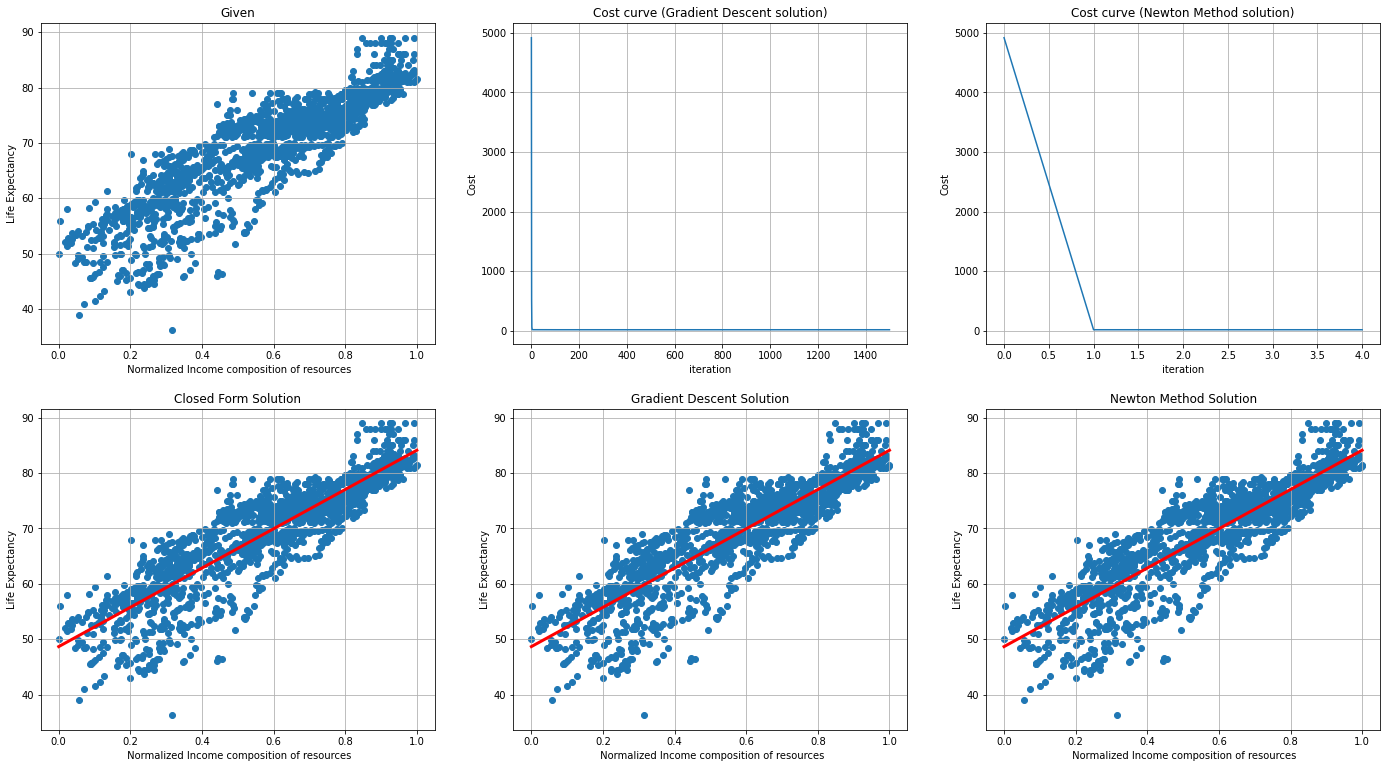

In [62]:
feature = 'Income composition of resources'
ux_train, ux_test, uy_train, uy_test = featureMatrix(feature)

#<========== Closed Form Solution ==========>
weightC = closedForm(ux_train, uy_train)

#<==========Gradient Descent Solution ==========>
weight = [0] * len(ux_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(ux_train, uy_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(ux_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), ux_train, uy_train, iter)

#<==========Printing and plotting the output ==========>
printOut(ux_test, uy_test, ux_train, uy_train, weightC, weightG, weightN, costsG, costsN, feature)

##Multivariate:

ON TEST DATA:
Closed Form solution
Mean Absolute Error: 2.58      Mean Squared Error: 12.49

Gradient Descent solution
Mean Absolute Error: 2.58      Mean Squared Error: 12.49

Newton Method solution
Mean Absolute Error: 2.58      Mean Squared Error: 12.49

ON TRAINING DATA:
Closed Form solution
Mean Absolute Error: 2.53      Mean Squared Error: 11.59

Gradient Descent solution
Mean Absolute Error: 2.53      Mean Squared Error: 11.59

Newton Method solution
Mean Absolute Error: 2.53      Mean Squared Error: 11.59



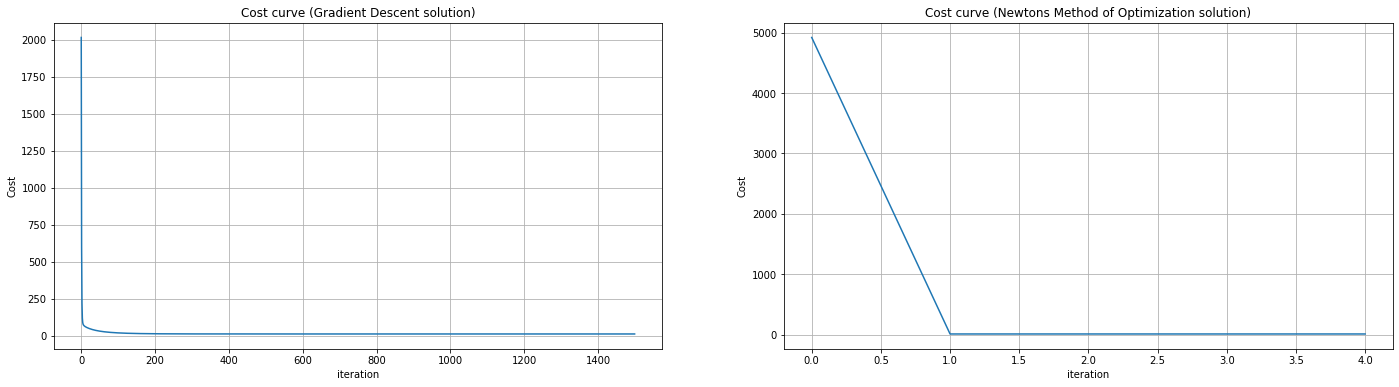

In [63]:
#<========== Closed Form Solution ==========>
weightC = closedForm(x_train, y_train)

#<==========Gradient Descent Solution ==========>
weight = [5] * len(x_train[0])
iter = 1500
mu = 0.5
weightG, costsG = gradient_descent(x_train, y_train, weight, iter, mu)

#<========== Newton's Method ==========>
weight = [0] * len(x_train[0])
iter = 5
weightN, costsN = NewtonGradientDescent(np.array(weight), x_train, y_train, iter)

print("\033[1mON TEST DATA:\033[0m")
errors(weightC, x_test, y_test, 'Closed Form')
errors(weightG, x_test, y_test, 'Gradient Descent')
errors(weightN, x_test, y_test, 'Newton Method')
print("\033[1mON TRAINING DATA:\033[0m")
errors(weightC, x_train, y_train, 'Closed Form')
errors(weightG, x_train, y_train, 'Gradient Descent')
errors(weightN, x_train, y_train, 'Newton Method')

plt.figure(figsize=(24, 6))
plt.subplot(1,2,1)
plotCost(costsG, 'Gradient Descent')
plt.subplot(1,2,2)
plotCost(costsN, 'Newtons Method of Optimization')